# Linear Regression with Overfitting
### Solve the linear regression using Regularization with L2 Ridge

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set random seed for reproducibility
np.random.seed(0)

In [11]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000, lamda=0.0):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.lamda = lamda

        self.history = {'loss': [], 'weights': [], 'bias': []}
    
    def fit(self, X, y):
        y = y.flatten()
        
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iterations):
            # Calculate predictions
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Compute and store loss
            loss = self._compute_loss(y, y_predicted)
            self.history['loss'].append(loss)
            self.history['weights'].append(self.weights.copy())
            self.history['bias'].append(self.bias)

    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def _compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2) + (self.lamda / (2 * len(y_true))) * np.sum(self.weights ** 2)


    def plot_loss_history(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.history['loss'], label='Loss')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Loss History')
        plt.legend()
        plt.grid(True)
        plt.show()


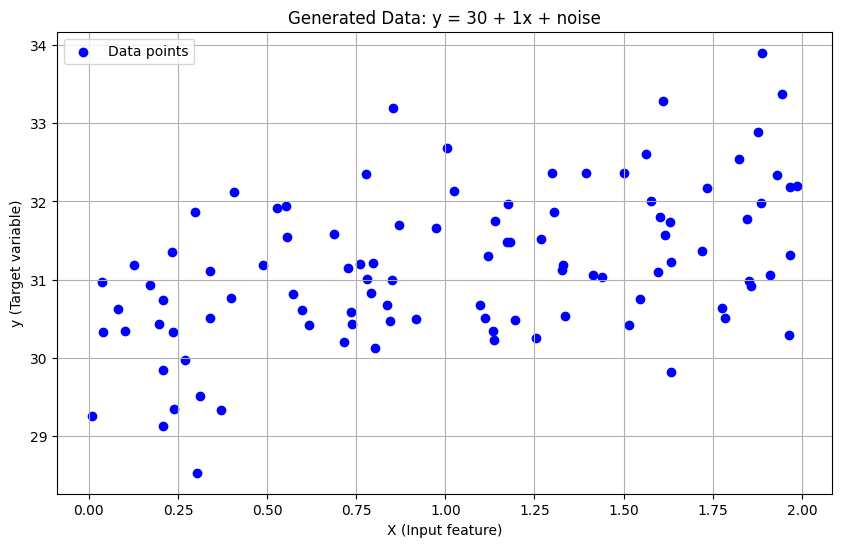

In [24]:
# Generate random data points
X = 2 * np.random.rand(100, 1)  # 100 random x values between 0 and 2
y = 30 + 1 * X + np.random.randn(100, 1)  # True relationship with added noise

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X (Input feature)')
plt.ylabel('y (Target variable)')
plt.title('Generated Data: y = 30 + 1x + noise')
plt.legend()
plt.grid(True)
plt.show()

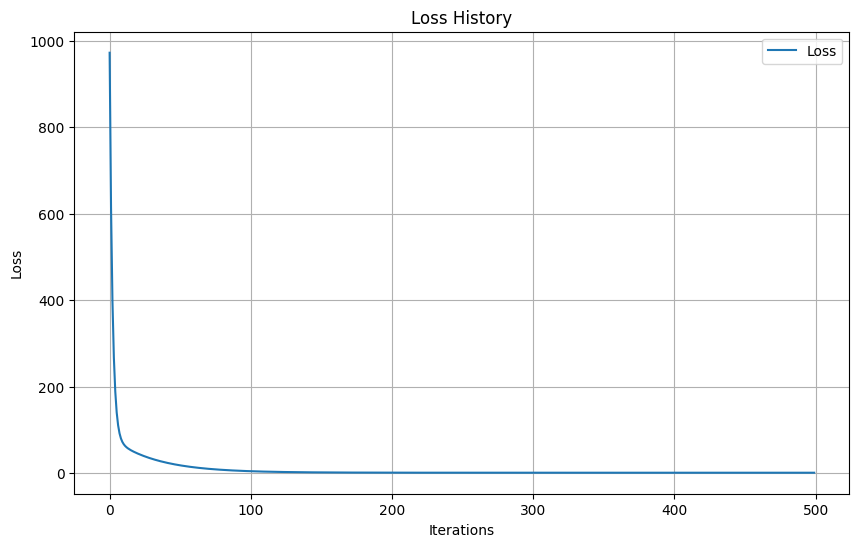

In [40]:
# Create and train the model
model = LinearRegressionScratch(learning_rate=0.1, n_iterations=500, lamda=0.01)
model.fit(X, y)

# Plot loss history
model.plot_loss_history()

In [41]:
model.weights, model.bias

(array([0.79522704]), 30.340734353881672)

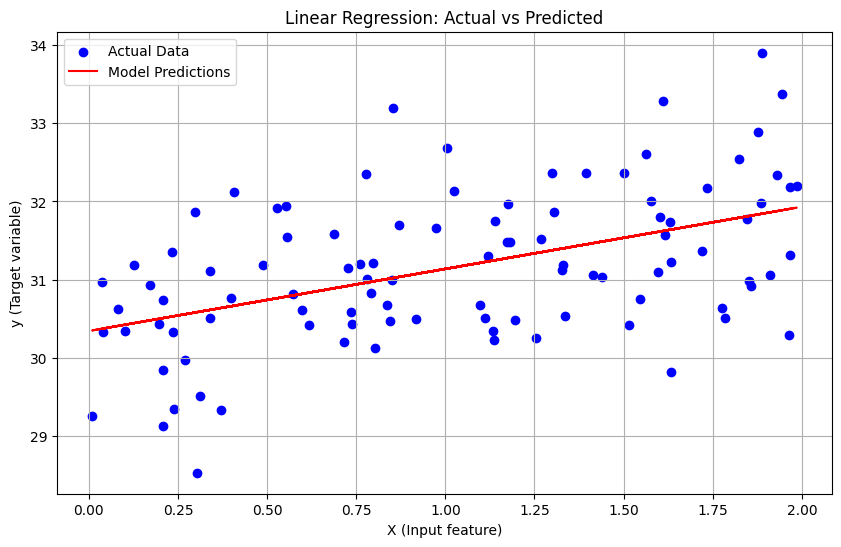

Model Parameters:
Weight (w): 0.7952 (True value: 1)
Bias (b): 30.3407 (True value: 30)

R² Score: -122.9688


In [42]:
# Make predictions
y_pred = model.predict(X)
    
# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Model Predictions')
plt.xlabel('X (Input feature)')
plt.ylabel('y (Target variable)')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

# Print model parameters
print("Model Parameters:")
print(f"Weight (w): {model.weights[0]:.4f} (True value: 1)")
print(f"Bias (b): {model.bias:.4f} (True value: 30)")

# Calculate and print R-squared score
y_mean = np.mean(y)
r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - y_mean)**2)
print(f"\nR² Score: {r2:.4f}")

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def create_learning_animation(X, y, model, n_frames=100):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(X.min(), X.max())
    ax.set_ylim(y.min() - 1, y.max() + 1)
    ax.scatter(X, y, color='blue', alpha=0.5)
    line, = ax.plot([], [], 'r-', lw=2)

    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        w = model.history['weights'][int(i * len(model.history['weights']) / n_frames)]
        b = model.history['bias'][int(i * len(model.history['bias']) / n_frames)]
        x = np.linspace(X.min(), X.max(), 100)
        y = w * x + b
        line.set_data(x, y)
        return line,

    anim = FuncAnimation(fig, animate, init_func=init, frames=n_frames, blit=True, interval=50)
    anim.save('./images/learning_process.gif', writer='pillow')
    plt.close(fig)

# Assuming you have X, y, and model objects defined
create_learning_animation(X, y, model)

![](./images/learning_process.gif)